# 1.Exploring the data and Data Pre-processing

In [2]:
#Exploring the data and Data Preprocessing:

import pandas as pd
import numpy as np
import seaborn as sb
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading data from Excel. Prepared manually train dataset
filepath = 'E:\\IPBA\BYOP\Train_dataset.xlsx'
xlSheet = 'Sheet1'
df_train = pd.read_excel(io=filepath, sheet_name = xlSheet)
df_train.head(10)
print(df_train)

        Invoice  Product_Code  Quantity  InvoiceDate   InvoiceDate_timeStamp  \
0         89058       7259395         3   2019-04-20 2019-04-20 06:02:02.338   
1         89058         10557         5   2019-04-20 2019-04-20 06:02:02.338   
2         89058       2733507         3   2019-04-20 2019-04-20 06:02:02.338   
3         89058       5200349         5   2019-04-20 2019-04-20 06:02:02.338   
4         89058        715497         3   2019-04-20 2019-04-20 06:02:02.338   
...         ...           ...       ...          ...                     ...   
305552    57307         56372         4  2020-12-31  2020-12-31 11:13:23.419   
305553    57307        325029         2  2020-12-31  2020-12-31 11:13:23.419   
305554    57307         13579         2  2020-12-31  2020-12-31 11:13:23.419   
305555    57307        715497         3  2020-12-31  2020-12-31 11:13:23.419   
305556    57307        939243         1  2020-12-31  2020-12-31 11:13:23.419   

        Price  Customer_ID Country  Pac

In [6]:
filepath = 'E:\\IPBA\BYOP\Test_dataset.xlsx'
xlSheet = 'Sheet1'
df_test = pd.read_excel(io=filepath, sheet_name = xlSheet)
df_test.head(10)
print(df_test)

        Invoice  Product_Code  Quantity  InvoiceDate   InvoiceDate_timeStamp  \
0         89058       7259395         3   2019-04-20 2019-04-20 06:02:02.338   
1         89058         10557         5   2019-04-20 2019-04-20 06:02:02.338   
2         89058       2733507         3   2019-04-20 2019-04-20 06:02:02.338   
3         89058       5200349         5   2019-04-20 2019-04-20 06:02:02.338   
4         89058        715497         3   2019-04-20 2019-04-20 06:02:02.338   
...         ...           ...       ...          ...                     ...   
802995    63494         46327         3  2022-12-04  2022-12-04 11:13:23.419   
802996    63494        669238         3  2022-12-04  2022-12-04 11:13:23.419   
802997    63494        325029         4  2022-12-04  2022-12-04 11:13:23.419   
802998    63494         13579         5  2022-12-04  2022-12-04 11:13:23.419   
802999    63494        669238         5  2022-12-04  2022-12-04 11:13:23.419   

        Price  Customer_ID Country  Pac

In [7]:
#statistical details of the dataset 
print(df_train.shape)

(305557, 17)


In [8]:
print(df_test.shape)

(803000, 17)


In [9]:
df_train.describe()

,Invoice,Product_Code,Quantity,Price,Customer_ID,Pack_Size_Code,In_Store_Promotion_Flag,Online_Promotion_Flag,Shelf_Space_Code,Year,Month,Day,Week,Sales Amount
count,305557.000000,3.055570e+05,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000,305557.000000
mean,54904.492586,1.882996e+06,3.503949,51.413658,54291.788727,2.500869,0.499442,0.499157,2.001404,2019.630246,7.806141,16.043193,32.643428,182.963012
std,26007.741033,2.533132e+06,1.381616,29.428899,26372.120863,1.117381,0.500001,0.500000,0.815876,0.482739,3.301116,8.873037,14.392273,136.905675
min,10002.000000,1.055700e+04,1.000000,2.000000,10125.000000,1.000000,0.000000,0.000000,1.000000,2019.000000,1.000000,1.000000,1.000000,3.000000
25%,32300.000000,7.318600e+04,3.000000,23.000000,30724.000000,2.000000,0.000000,0.000000,1.000000,2019.000000,5.000000,8.000000,21.000000,70.000000
50%,54742.000000,6.692380e+05,4.000000,55.000000,53618.000000,2.000000,0.000000,0.000000,2.000000,2020.000000,8.000000,16.000000,35.000000,154.000000
75%,77623.000000,2.733507e+06,5.000000,78.000000,77549.000000,4.000000,1.000000,1.000000,3.000000,2020.000000,11.000000,24.000000,46.000000,273.000000
max,99996.000000,8.991517e+06,6.000000,100.000000,99988.000000,4.000000,1.000000,1.000000,3.000000,2020.000000,12.000000,31.000000,53.000000,600.000000


In [10]:
#summary of the dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305557 entries, 0 to 305556
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Invoice                  305557 non-null  int64         
 1   Product_Code             305557 non-null  int64         
 2   Quantity                 305557 non-null  int64         
 3   InvoiceDate              305557 non-null  object        
 4   InvoiceDate_timeStamp    305557 non-null  datetime64[ns]
 5   Price                    305557 non-null  int64         
 6   Customer_ID              305557 non-null  int64         
 7   Country                  305557 non-null  object        
 8   Pack_Size_Code           305557 non-null  int64         
 9   In_Store_Promotion_Flag  305557 non-null  int64         
 10  Online_Promotion_Flag    305557 non-null  int64         
 11  Shelf_Space_Code         305557 non-null  int64         
 12  Year            

In [11]:
df_train1 = df_train
print (df_train1)

        Invoice  Product_Code  Quantity  InvoiceDate   InvoiceDate_timeStamp  \
0         89058       7259395         3   2019-04-20 2019-04-20 06:02:02.338   
1         89058         10557         5   2019-04-20 2019-04-20 06:02:02.338   
2         89058       2733507         3   2019-04-20 2019-04-20 06:02:02.338   
3         89058       5200349         5   2019-04-20 2019-04-20 06:02:02.338   
4         89058        715497         3   2019-04-20 2019-04-20 06:02:02.338   
...         ...           ...       ...          ...                     ...   
305552    57307         56372         4  2020-12-31  2020-12-31 11:13:23.419   
305553    57307        325029         2  2020-12-31  2020-12-31 11:13:23.419   
305554    57307         13579         2  2020-12-31  2020-12-31 11:13:23.419   
305555    57307        715497         3  2020-12-31  2020-12-31 11:13:23.419   
305556    57307        939243         1  2020-12-31  2020-12-31 11:13:23.419   

        Price  Customer_ID Country  Pac

In [12]:
df_train = df_train.drop(['Country'],axis = 1)

In [13]:
df_train.head(5)
#print(df_train)

,Invoice,Product_Code,Quantity,InvoiceDate,InvoiceDate_timeStamp,Price,Customer_ID,Pack_Size_Code,In_Store_Promotion_Flag,Online_Promotion_Flag,Shelf_Space_Code,Year,Month,Day,Week,Sales Amount
0,89058,7259395,3,2019-04-20,2019-04-20 06:02:02.338,62,38055,3,0,0,3,2019,4,20,16,186
1,89058,10557,5,2019-04-20,2019-04-20 06:02:02.338,37,38055,3,1,0,1,2019,4,20,16,185
2,89058,2733507,3,2019-04-20,2019-04-20 06:02:02.338,48,38055,1,1,0,1,2019,4,20,16,144
3,89058,5200349,5,2019-04-20,2019-04-20 06:02:02.338,100,38055,4,1,1,2,2019,4,20,16,500
4,89058,715497,3,2019-04-20,2019-04-20 06:02:02.338,91,38055,2,1,1,1,2019,4,20,16,273


In [14]:
#Checking for missing values in the dataset
df_train.isna().sum()

Invoice                    0
Product_Code               0
Quantity                   0
InvoiceDate                0
InvoiceDate_timeStamp      0
Price                      0
Customer_ID                0
Pack_Size_Code             0
In_Store_Promotion_Flag    0
Online_Promotion_Flag      0
Shelf_Space_Code           0
Year                       0
Month                      0
Day                        0
Week                       0
Sales Amount               0
dtype: int64

In [15]:
df_train.head(5)

,Invoice,Product_Code,Quantity,InvoiceDate,InvoiceDate_timeStamp,Price,Customer_ID,Pack_Size_Code,In_Store_Promotion_Flag,Online_Promotion_Flag,Shelf_Space_Code,Year,Month,Day,Week,Sales Amount
0,89058,7259395,3,2019-04-20,2019-04-20 06:02:02.338,62,38055,3,0,0,3,2019,4,20,16,186
1,89058,10557,5,2019-04-20,2019-04-20 06:02:02.338,37,38055,3,1,0,1,2019,4,20,16,185
2,89058,2733507,3,2019-04-20,2019-04-20 06:02:02.338,48,38055,1,1,0,1,2019,4,20,16,144
3,89058,5200349,5,2019-04-20,2019-04-20 06:02:02.338,100,38055,4,1,1,2,2019,4,20,16,500
4,89058,715497,3,2019-04-20,2019-04-20 06:02:02.338,91,38055,2,1,1,1,2019,4,20,16,273


In [16]:
df_train.Product_Code.value_counts()

25404      7823
109219     7819
13579      7787
939243     7745
211214     7719
4309318    7718
5200349    7715
73186      7715
433680     7703
405475     7700
4973899    7690
10557      7687
39505      7683
453233     7651
585416     7647
328113     7643
669238     7636
673422     7632
715497     7632
7259395    7631
1854506    7626
4617477    7621
3611064    7616
64923      7614
325029     7613
56372      7609
2733507    7608
806301     7601
445714     7599
8991517    7593
46327      7593
887773     7589
692904     7580
8317014    7563
54578      7560
15811      7548
5610377    7529
6417803    7527
1709239    7525
897016     7467
Name: Product_Code, dtype: int64

In [17]:
df_train.Customer_ID.value_counts()

81714    413
73985    411
45129    369
76222    367
90276    365
        ... 
17156     31
73933     31
35158     27
73427     26
39717     21
Name: Customer_ID, Length: 1978, dtype: int64

In [18]:
df_train.Pack_Size_Code.value_counts()

2    76807
4    76468
3    76195
1    76087
Name: Pack_Size_Code, dtype: int64

# Univariate Analysis:

In [31]:

df_train2 = df_train1[['Year', 'Sales Amount']]
print(df_train2)

        Year  Sales Amount
0       2019           186
1       2019           185
2       2019           144
3       2019           500
4       2019           273
...      ...           ...
305552  2020            16
305553  2020            10
305554  2020           168
305555  2020           300
305556  2020            24

[305557 rows x 2 columns]


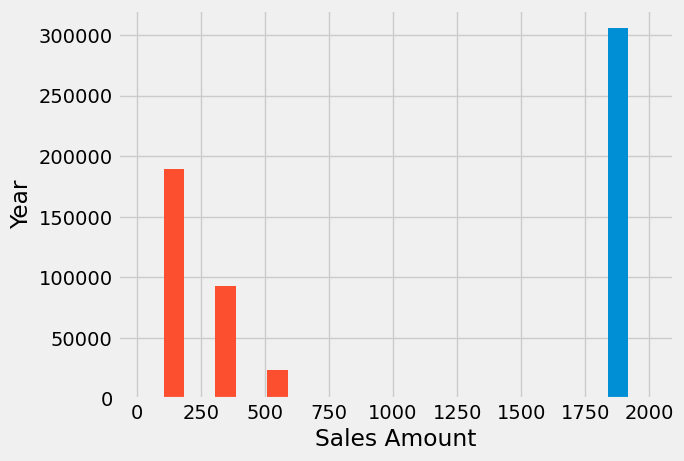

In [33]:
fig,ax = plt.subplots(1,1)
plt.hist(df_train2)
ax.set_xlabel('Year')
ax.set_ylabel('Sales Amount')
plt.show()

Text(0.5, 1.0, 'Sales Amount Distrubution')

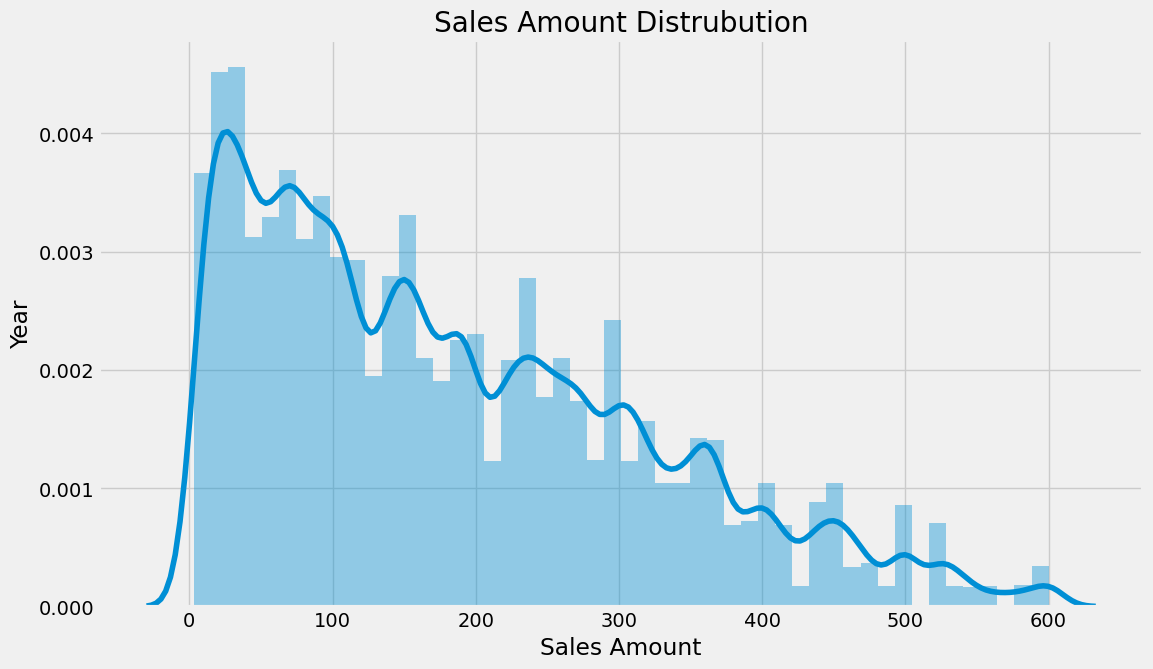

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
#sb.distplot(df_train.Pack_Size_Code, bins = 25)
#sb.distplot(df_train['Year']);
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits = (0,1))
plt.xlabel("Sales Amount")
plt.ylabel("Year")
sb.distplot(df_train2['Sales Amount']);
plt.title("Sales Amount Distrubution")




In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (12,7))
#sb.distplot(df_train.Pack_Size_Code, bins = 25)
#sb.distplot(df_train['Year']);
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits = (0,1))
plt.xlabel("Sales Amount")
plt.ylabel("Year")
sb.distplot(df_train['Sales Amount']);
plt.title("Sales Amount Distrubution")

In [103]:
print("skewness: %f" % df_train['Sales Amount'].skew())
print("kurtosis: %f" % df_train['Sales Amount'].kurt())

skewness: 0.762533
kurtosis: -0.160846


<AxesSubplot:xlabel='Year', ylabel='Sales Amount'>

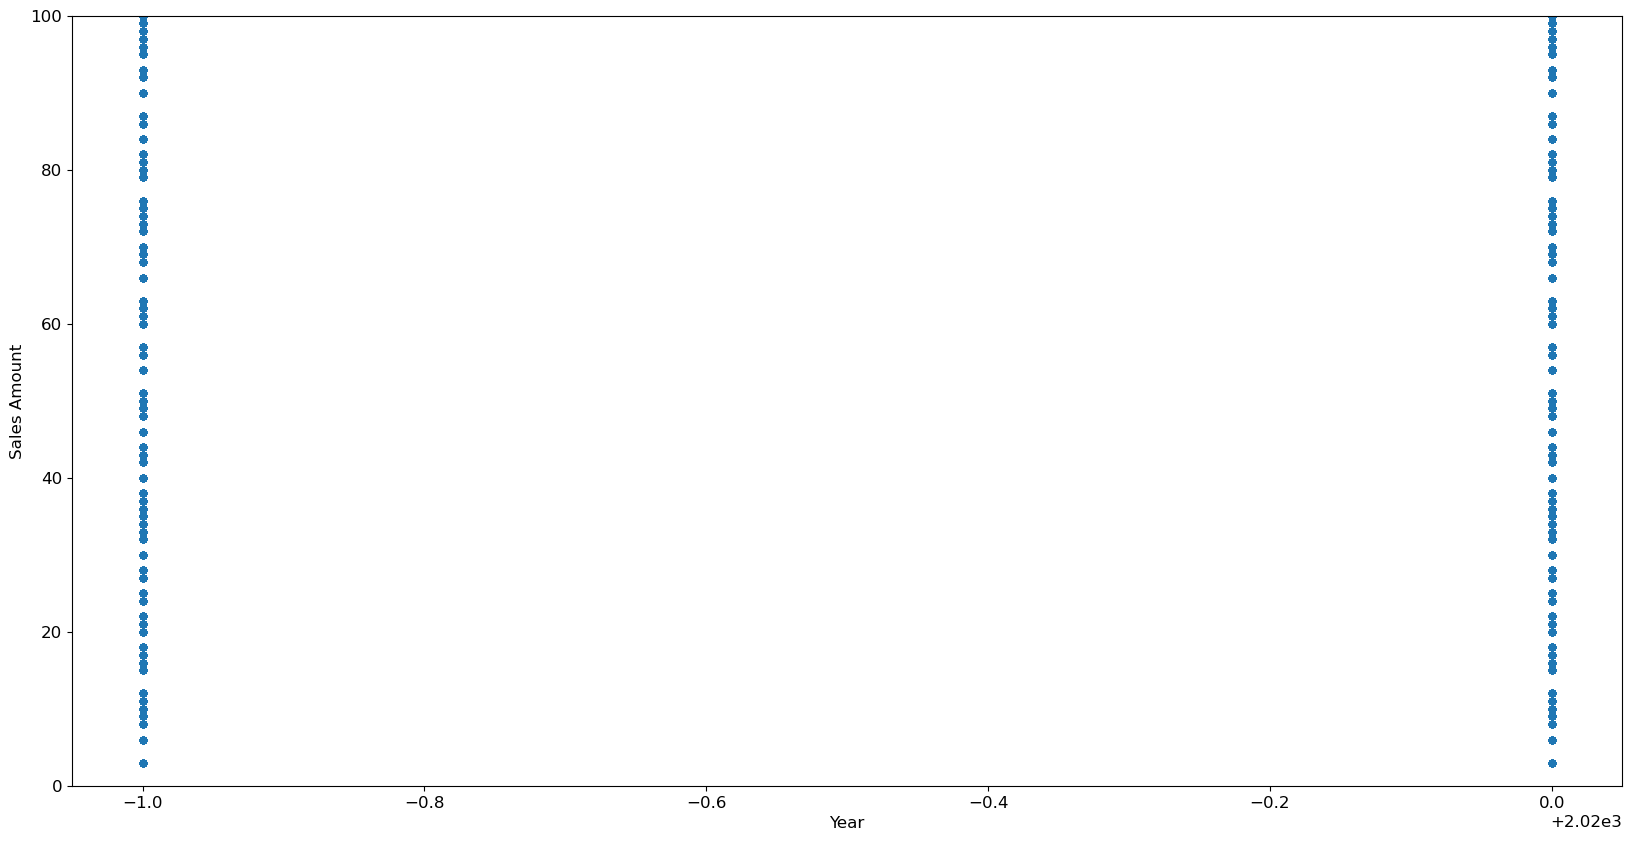

In [104]:
#BiVariant Analysis
var = 'Year'
data = pd.concat([df_train['Sales Amount'], df_train[var]], axis=1)
data.plot.scatter(x=var , y='Sales Amount',ylim=(0,100))

(-0.5, 1.5, 0.0, 100.0)

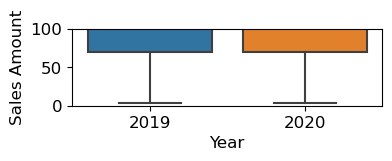

In [105]:
var = 'Year'
data = pd.concat([df_train['Sales Amount'],df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(4,1))
fig = sb.boxplot(x=var, y="Sales Amount", data=data)
fig.axis(ymin=0, ymax=100)

# EDA And Time Series Analysis for Sales Forecast

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import matplotlib.ticker as ticker
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [106]:

df_train = df_train.astype({"Customer_ID": 'string'})
df_train = df_train.astype({"Product_Code": 'string'})
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305557 entries, 0 to 305556
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Invoice                  305557 non-null  int64         
 1   Product_Code             305557 non-null  string        
 2   Quantity                 305557 non-null  int64         
 3   InvoiceDate              305557 non-null  object        
 4   InvoiceDate_timeStamp    305557 non-null  datetime64[ns]
 5   Price                    305557 non-null  int64         
 6   Customer_ID              305557 non-null  string        
 7   Pack_Size_Code           305557 non-null  int64         
 8   In_Store_Promotion_Flag  305557 non-null  int64         
 9   Online_Promotion_Flag    305557 non-null  int64         
 10  Shelf_Space_Code         305557 non-null  int64         
 11  Year                     305557 non-null  int64         
 12  Month           

In [107]:
df_train.head(5)

,Invoice,Product_Code,Quantity,InvoiceDate,InvoiceDate_timeStamp,Price,Customer_ID,Pack_Size_Code,In_Store_Promotion_Flag,Online_Promotion_Flag,Shelf_Space_Code,Year,Month,Day,Week,Sales Amount
0,89058,7259395,3,2019-04-20,2019-04-20 06:02:02.338,62,38055,3,0,0,3,2019,4,20,16,186
1,89058,10557,5,2019-04-20,2019-04-20 06:02:02.338,37,38055,3,1,0,1,2019,4,20,16,185
2,89058,2733507,3,2019-04-20,2019-04-20 06:02:02.338,48,38055,1,1,0,1,2019,4,20,16,144
3,89058,5200349,5,2019-04-20,2019-04-20 06:02:02.338,100,38055,4,1,1,2,2019,4,20,16,500
4,89058,715497,3,2019-04-20,2019-04-20 06:02:02.338,91,38055,2,1,1,1,2019,4,20,16,273


# Most Valuable Customers

In [108]:
#top_customer = df_train.sort_values(['Sales Amount'],ascending=False).groupby('Customer_ID').head(5)
top_customer = df_train.groupby(['Customer_ID']).sum().sort_values('Sales Amount', ascending = False).head(20)
top_customer = top_customer[['Sales Amount']]
top_customer.reset_index(inplace = True)
top_customer

,Customer_ID,Sales Amount
0,73985,76445
1,81714,75354
2,31682,73161
3,90276,71824
4,76222,67390
5,45129,67042
6,97059,64944
7,36318,63591
8,23084,63044
9,25635,62994


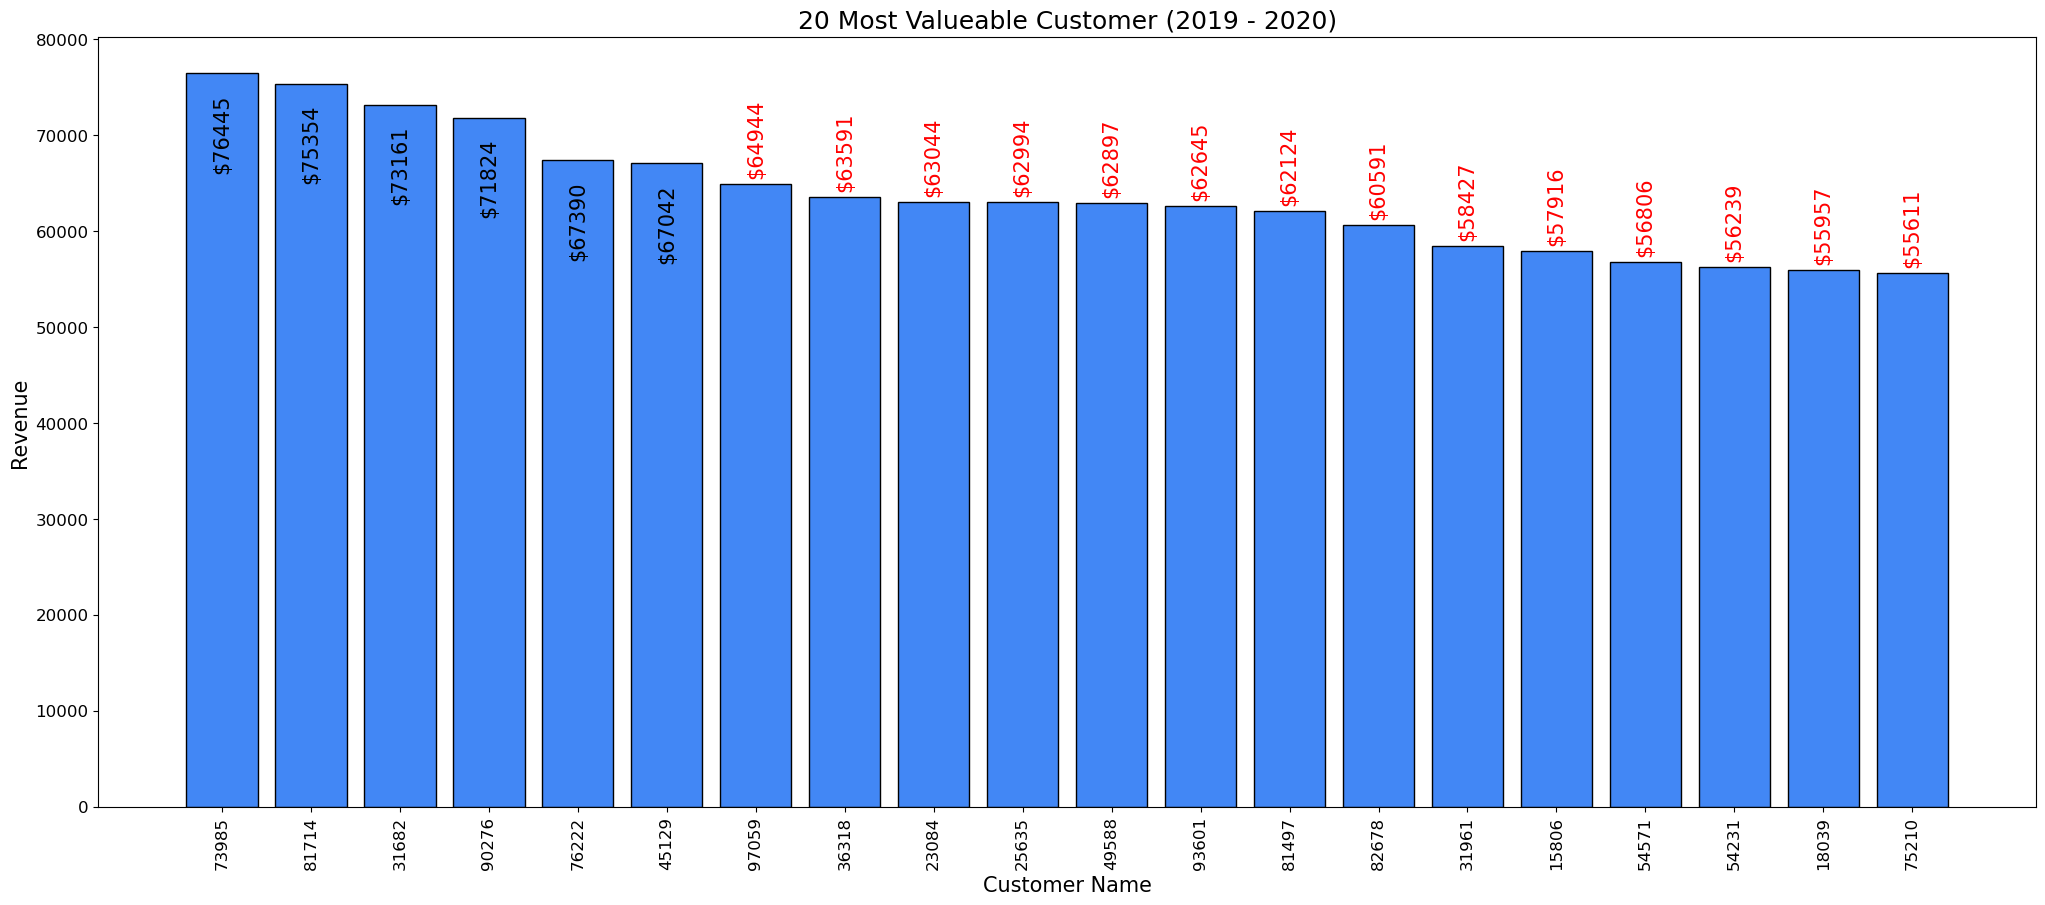

In [109]:
plt.figure(figsize = (25,10))
plt.title('20 Most Valueable Customer (2019 - 2020)', fontsize = 18)
plt.bar(top_customer['Customer_ID'], top_customer['Sales Amount'], color = '#4287f5', edgecolor = 'black', linewidth = 1)
plt.xlabel('Customer Name', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v in top_customer['Sales Amount'].items():
    if v > 65000:
        plt.text(k, v-10000, '$' + str(v), fontsize = 15, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+ 1000, '$' + str(v), fontsize = 15, rotation = 90, color = 'red', ha = 'center')

# Product Wise Sales

In [110]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305557 entries, 0 to 305556
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Invoice                  305557 non-null  int64         
 1   Product_Code             305557 non-null  string        
 2   Quantity                 305557 non-null  int64         
 3   InvoiceDate              305557 non-null  object        
 4   InvoiceDate_timeStamp    305557 non-null  datetime64[ns]
 5   Price                    305557 non-null  int64         
 6   Customer_ID              305557 non-null  string        
 7   Pack_Size_Code           305557 non-null  int64         
 8   In_Store_Promotion_Flag  305557 non-null  int64         
 9   Online_Promotion_Flag    305557 non-null  int64         
 10  Shelf_Space_Code         305557 non-null  int64         
 11  Year                     305557 non-null  int64         
 12  Month           

In [28]:
top_product = df_train.groupby(['Product_Code']).sum().sort_values('Sales Amount', ascending = False).head(20)
top_product = top_product[['Sales Amount']]
top_product.reset_index(inplace = True)
top_product 


,Product_Code,Sales Amount
0,806301,2163998
1,5200349,2083958
2,887773,2022569
3,453233,1954663
4,445714,1949195
5,715497,1945692
6,6417803,1938172
7,13579,1854516
8,73186,1810524
9,328113,1799136


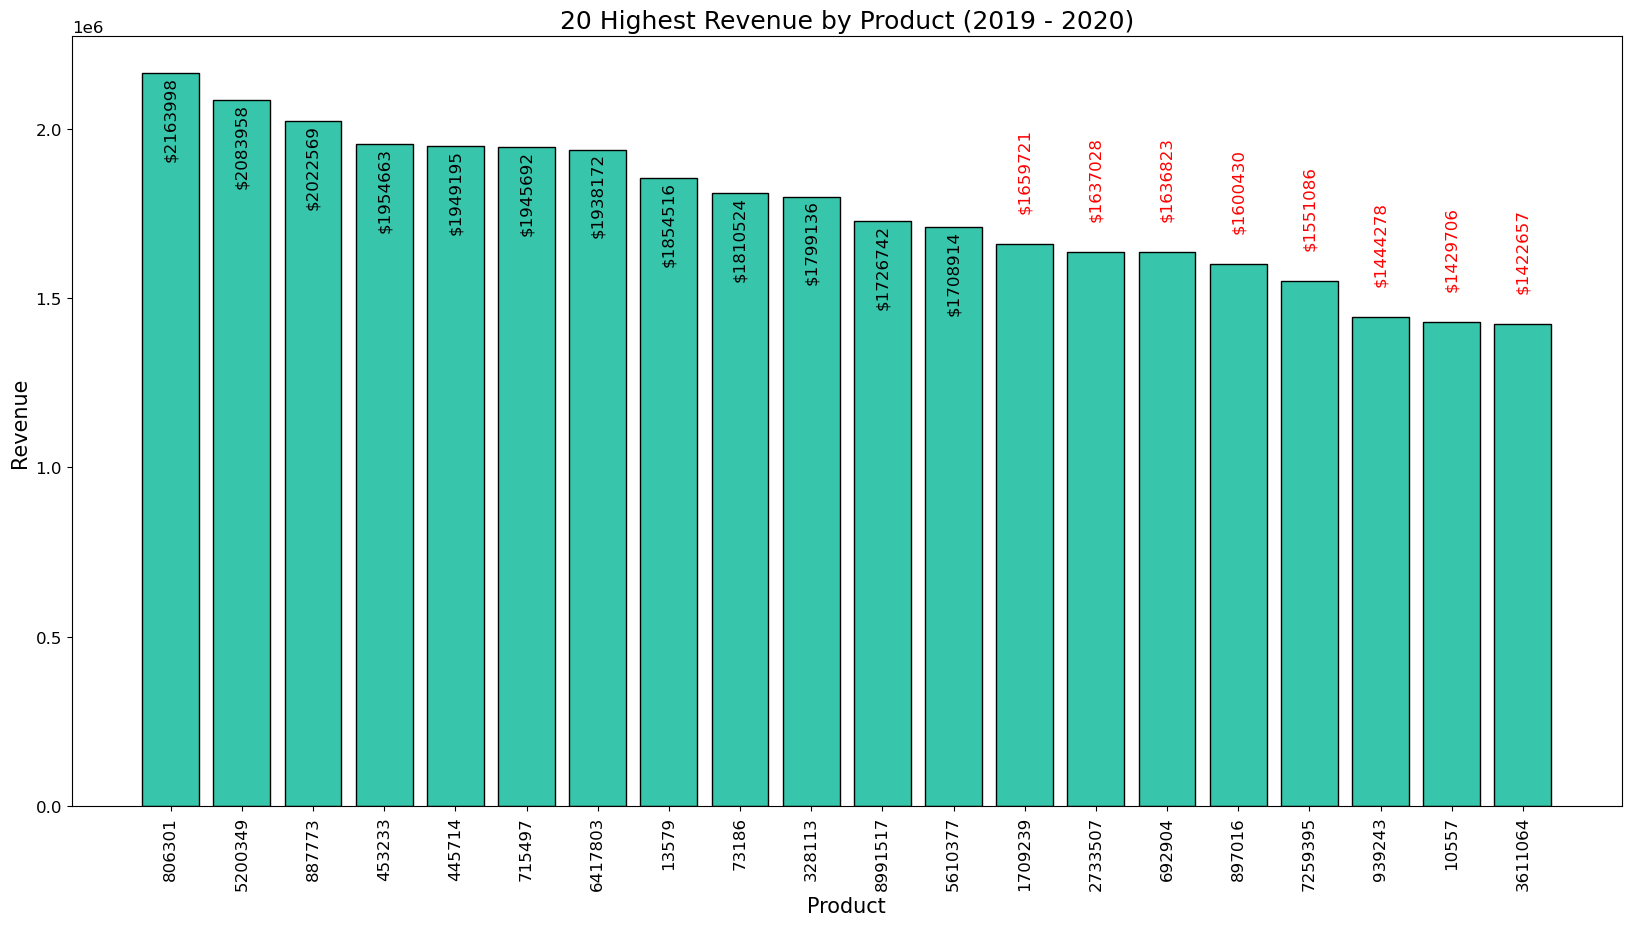

In [111]:
plt.figure(figsize = (20,10))
plt.title('20 Highest Revenue by Product (2019 - 2020)', fontsize = 18)
plt.bar(top_product['Product_Code'], top_product['Sales Amount'], color = '#37C6AB', edgecolor = 'black', linewidth = 1 )
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
for k, v, in top_product['Sales Amount'].items():
    if v > 1700000:
        plt.text(k, v-250000, '$' + str(v), fontsize = 12, rotation = 90, color = 'black', ha = 'center')
    else:
        plt.text(k, v+100000, '$' + str(v), fontsize = 12, rotation = 90, color = 'red', ha = 'center')

In [112]:
top_Pack = df_train.groupby(['Pack_Size_Code']).sum().sort_values('Quantity', ascending = False)
top_Pack = top_Pack[['Quantity']]
top_Pack.reset_index(inplace = True)
print(top_Pack)


   Pack_Size_Code  Quantity
0               4    382403
1               3    304906
2               2    230595
3               1    152752


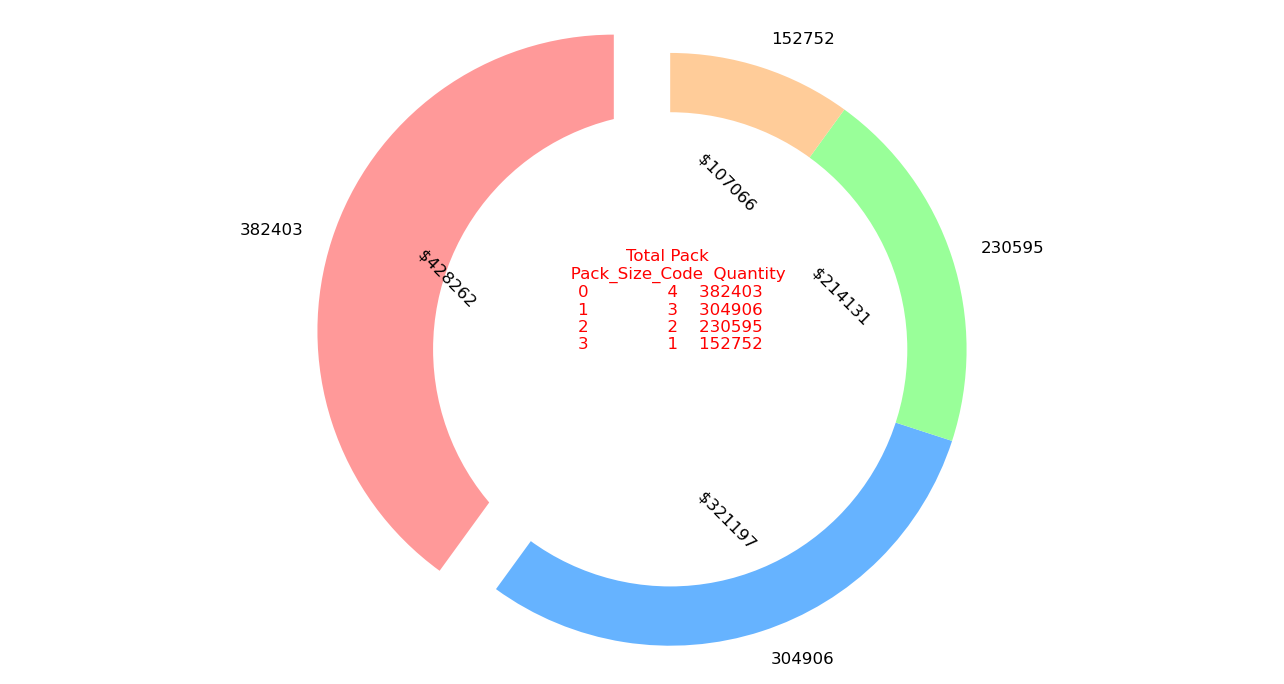

In [113]:
plt.rcParams['figure.figsize'] = (13,7)
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 6
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v = val)
    return my_format
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#55B4B0','#E15D44','#009B77']
explode = [0.2, 0, 0, 0] #[0.05,0.05,0.05,0.05,0.05,0.05,0.05]
fig1, ax1 = plt.subplots()
pie1 = ax1.pie(top_Pack['Pack_Size_Code'], colors = colors, labels = top_Pack['Quantity'], autopct = autopct_format(top_Pack['Quantity']), startangle = 90, explode = explode)
fraction_text_list = pie1[2]
for text in fraction_text_list:
    text.set_rotation(315)
center_circle = plt.Circle((0,0), 0.80, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
ax1.axis('equal')
label = ax1.annotate('Total Pack \n' + str(top_Pack), color = 'red', xy = (0,0), fontsize = 12, ha  ='center')
plt.tight_layout()
plt.show()

<AxesSubplot:>

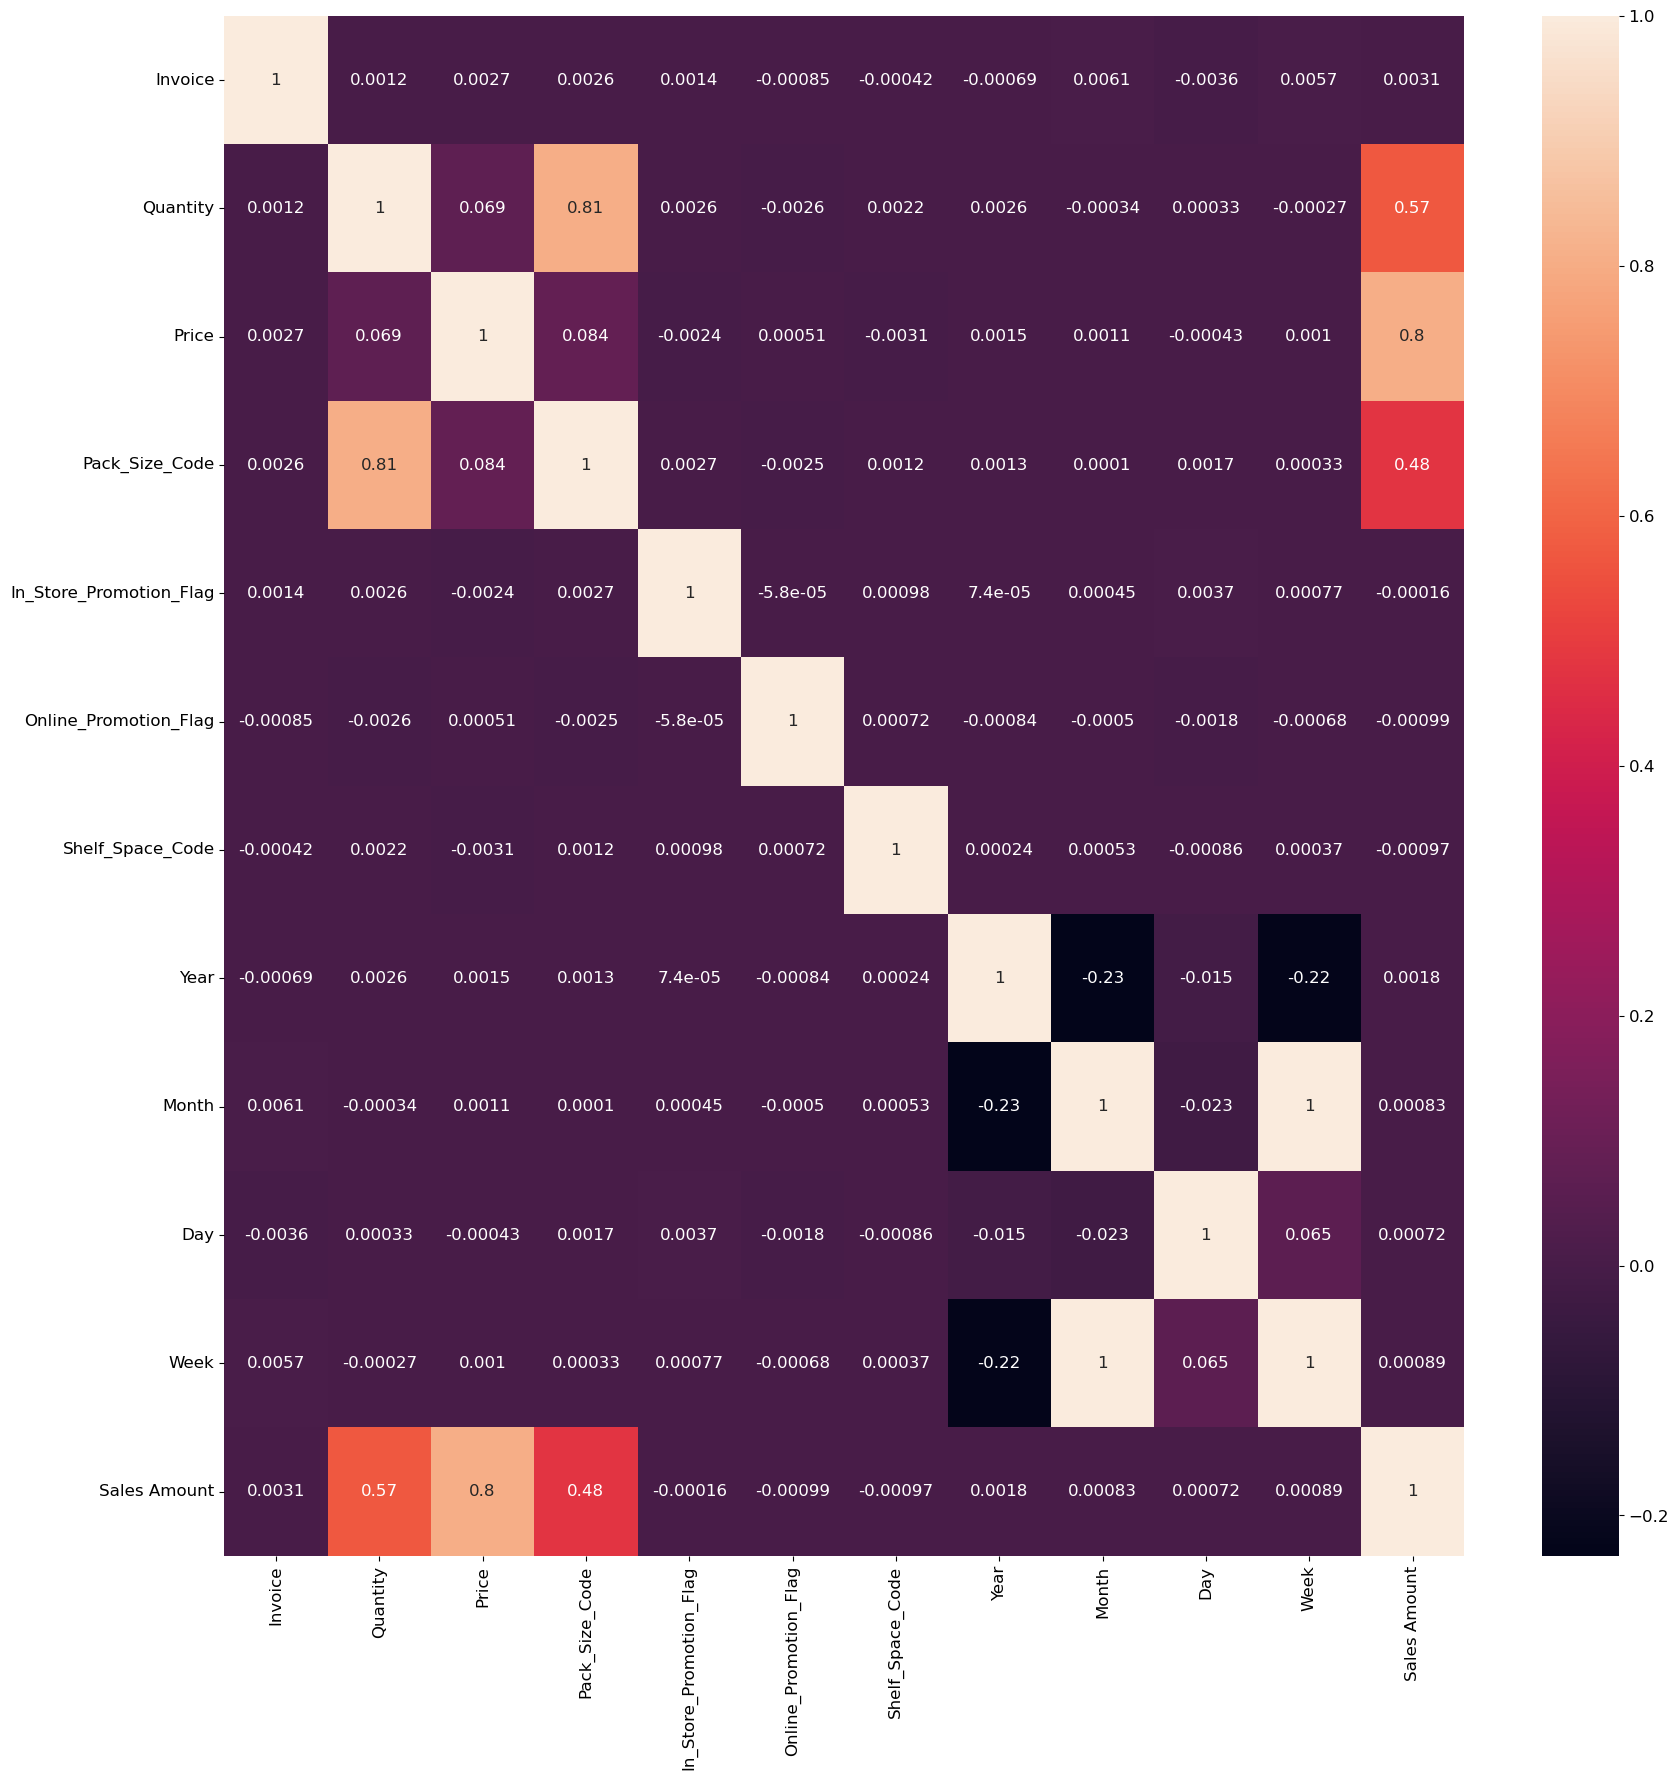

In [114]:
plt.figure(figsize = (20,20))
corr_matrix = df_train.corr()
sb.heatmap(corr_matrix, annot = True)

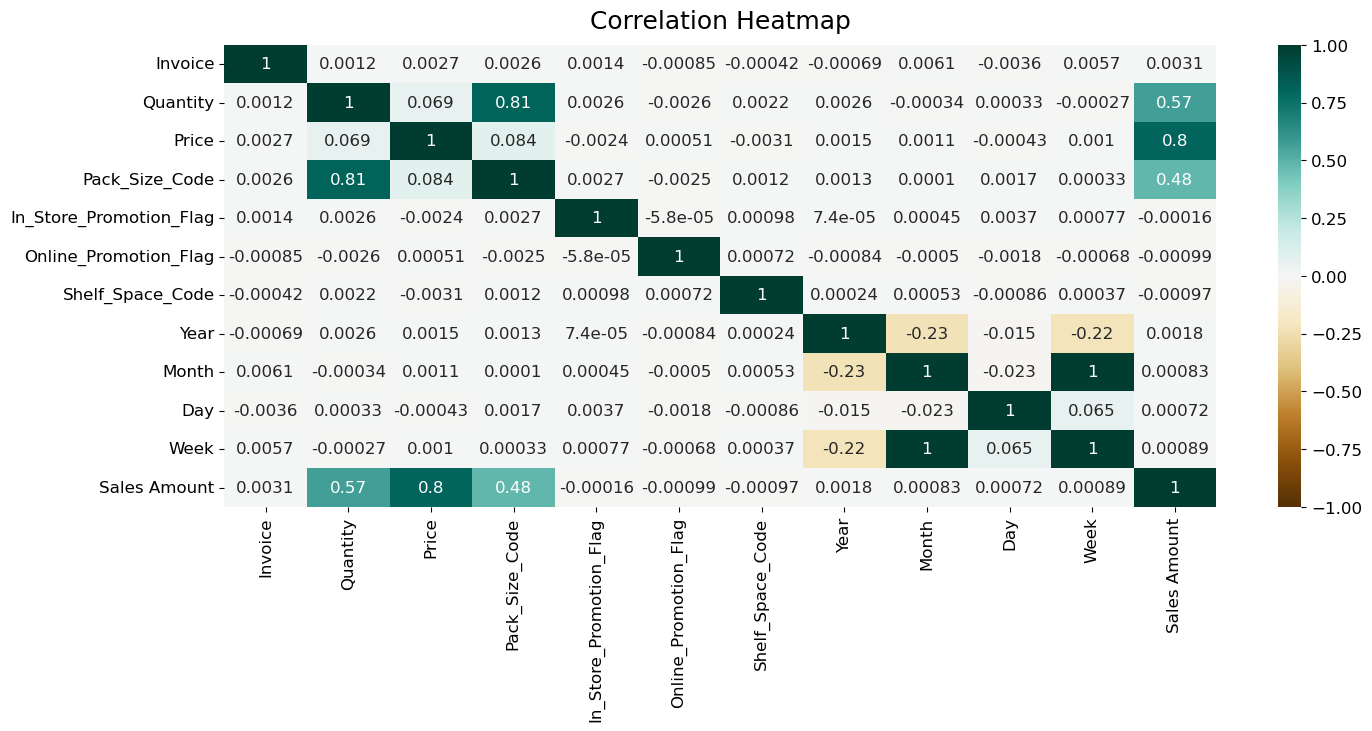

In [115]:
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

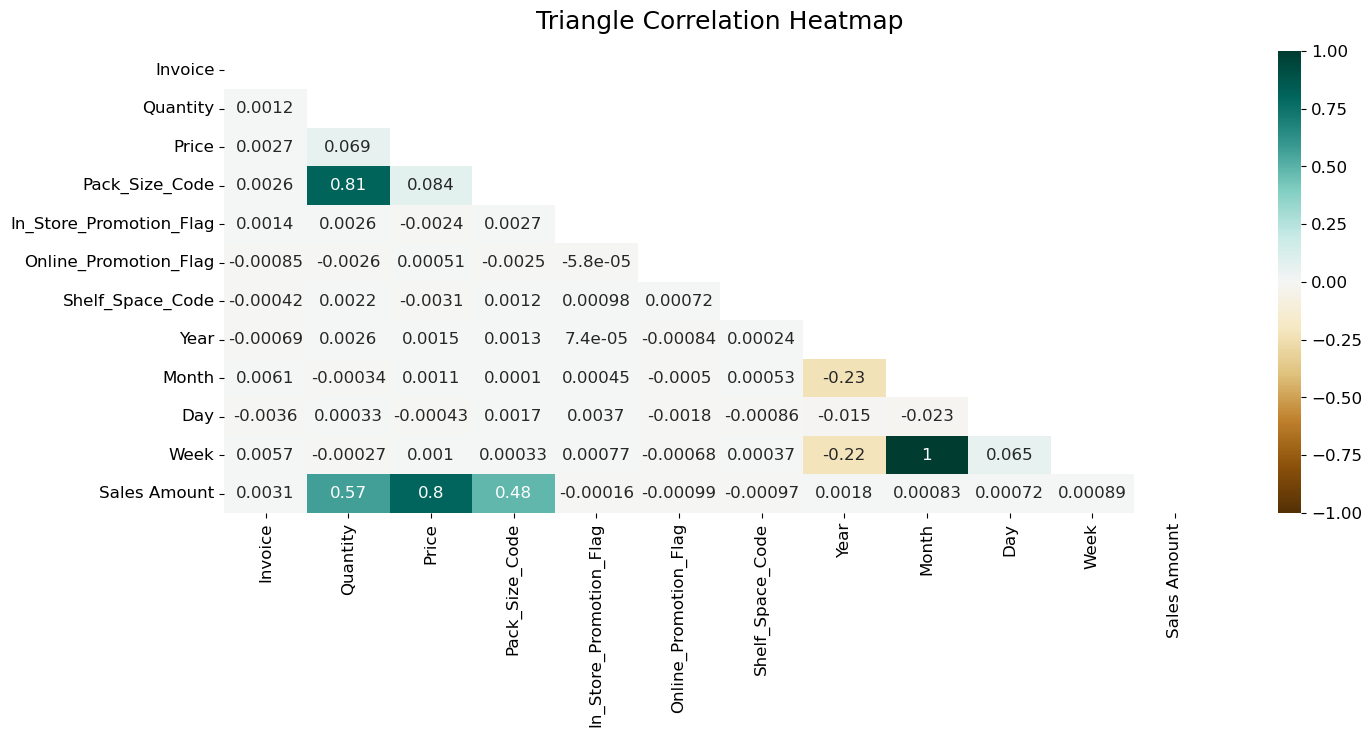

In [116]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sb.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

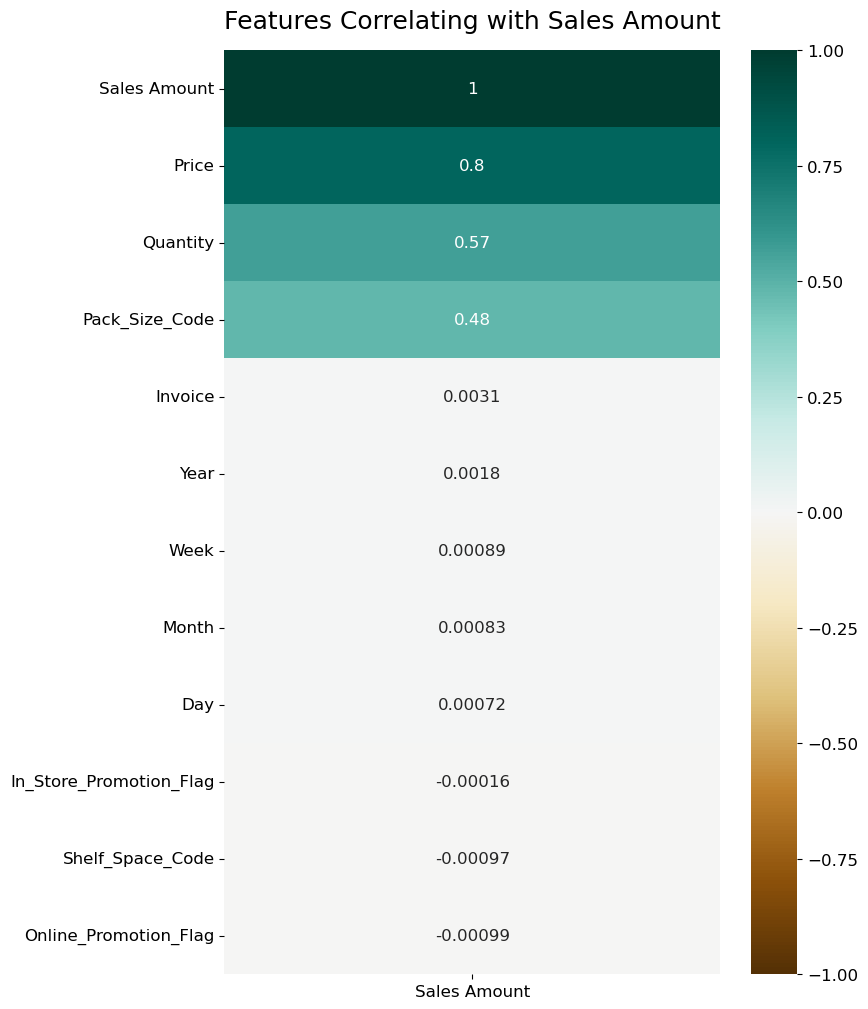

In [117]:
plt.figure(figsize=(8, 12))
heatmap = sb.heatmap(df_train.corr()[['Sales Amount']].sort_values(by='Sales Amount', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Amount', fontdict={'fontsize':18}, pad=16);

In [121]:
print('InvoiceDate Description\n')
print(df_train['Year'].describe(datetime_is_numeric=True))

#print('Year Description\n')
#print(df_train['Year'].describe(datetime_is_numeric=True))


InvoiceDate Description

count    305557.000000
mean       2019.630246
std           0.482739
min        2019.000000
25%        2019.000000
50%        2020.000000
75%        2020.000000
max        2020.000000
Name: Year, dtype: float64


In [131]:
df_train.head(5)
df_train_t = df_train
df_train_t.head(5)

,Invoice,Product_Code,Quantity,Price,Customer_ID,Pack_Size_Code,In_Store_Promotion_Flag,Online_Promotion_Flag,Shelf_Space_Code,Month,Day,Week,Sales Amount
InvoiceDate_timeStamp,,,,,,,,,,,,,
2019-04-20 06:02:02.338,89058,7259395,3,62,38055,3,0,0,3,4,20,16,186
2019-04-20 10:34:28.284,76331,328113,2,56,28443,2,1,0,3,4,20,16,112
2019-04-20 09:16:38.013,92009,109219,3,17,90113,2,1,0,2,4,20,16,51
2019-04-20 09:16:38.013,92009,4973899,1,12,90113,1,0,1,1,4,20,16,12
2019-04-20 09:16:38.013,92009,692904,4,39,90113,3,1,1,3,4,20,16,156


In [ ]:
df_train_t = df_train_t.drop(['InvoiceDate_timeStamp'],axis = 1)
df_train_t = df_train_t.drop(['Invoice'],axis = 1)
df_train_t = df_train_t.drop(['Product_Code'],axis = 1)
df_train_t = df_train_t.drop(['Quantity'],axis = 1)
df_train_t = df_train_t.drop(['Price'],axis = 1)
df_train_t = df_train_t.drop(['Customer_ID'],axis = 1)
df_train_t = df_train_t.drop(['Pack_Size_Code'],axis = 1)
df_train_t = df_train_t.drop(['In_Store_Promotion_Flag'],axis = 1)
df_train_t = df_train_t.drop(['Online_Promotion_Flag'],axis = 1)



In [129]:
df_train.sort_values(by = ['InvoiceDate'], inplace = True, ascending = True)
df_train.set_index('InvoiceDate_timeStamp', inplace = True)
new_data = pd.DataFrame(df_train['Sales Amount'])
new_data.head(5)


,Sales Amount
InvoiceDate_timeStamp,
2019-04-20 06:02:02.338,186
2019-04-20 10:34:28.284,112
2019-04-20 09:16:38.013,51
2019-04-20 09:16:38.013,12
2019-04-20 09:16:38.013,156


<AxesSubplot:xlabel='InvoiceDate_timeStamp'>

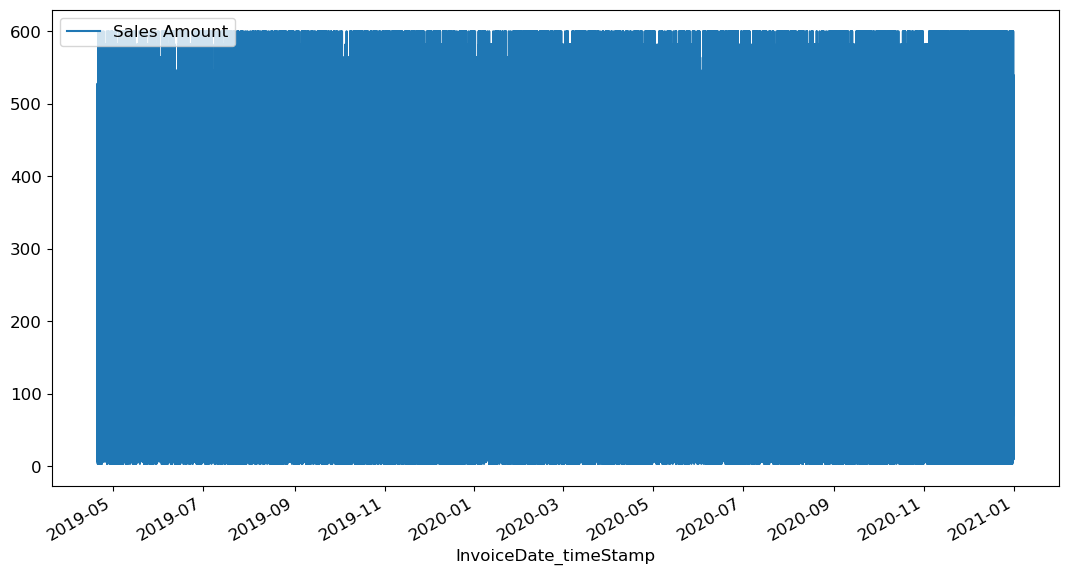

In [130]:
new_data.plot()

In [120]:
new_data = pd.DataFrame(df_train1['InvoiceDate_timeStamp'].resample('D').mean())
new_data = df_train.interpolate(method = 'linear')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [69]:
train, test, validation = np.split(new_data['Sales Amount'].sample(frac = 1), [int(.6*len(new_data['Sales Amount'])), int(.8*len(new_data['Sales Amount']))])

In [70]:
print('Train Dataset')
print(train)
print('Test Dataset')
print(test)
print('Validation Dataset')
print(validation)

Train Dataset
InvoiceDate
2020-01-17      34
2019-06-05     240
2019-05-30     364
2019-07-06     160
2020-08-24      15
              ... 
2020-06-06      18
2020-12-20      12
2020-12-31      12
2019-12-05      79
2020-06-18     276
Name: Sales Amount, Length: 183334, dtype: int64
Test Dataset
InvoiceDate
2019-10-20     300
2019-12-03     308
2019-11-16     122
2019-11-28       6
2019-08-27      66
              ... 
2020-09-10      18
2020-12-18      22
2019-08-24     292
2020-09-23     195
2020-08-01     522
Name: Sales Amount, Length: 61111, dtype: int64
Validation Dataset
InvoiceDate
2020-01-15      36
2019-10-20      98
2020-10-18     282
2019-05-01      84
2020-08-04      84
              ... 
2020-03-22     440
2020-02-10     364
2020-01-30     154
2020-12-17      20
2019-07-03      27
Name: Sales Amount, Length: 61112, dtype: int64


# Augmented Dicky Fuller Test

In [71]:
from statsmodels.tsa.stattools import adfuller
#statsmodel provied addfuller()
data1 = new_data.iloc[:,0].values
adf = adfuller(data1) 

print(adf)
print('\nADF = ', str(adf[0]))
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items():
    print(key,':',val)
    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')
        
 

(-5.05357790348086, 1.7366964720206744e-05, 90, 305466, {'1%': -3.430371407799732, '5%': -2.8615494619822215, '10%': -2.5667750362698167}, 3568262.815852381)

ADF =  -5.05357790348086

p-value =  1.7366964720206744e-05

Critical Values: 
1% : -3.430371407799732
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8615494619822215
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.5667750362698167
Null Hypothesis Rejected. Time Series is Stationary


In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


In [73]:

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model = 'additive', extrapolate_trend='freq', period=10)

fig = decomposition.plot()
plt.show()

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 2000x1000 with 4 Axes>

In [74]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


In [61]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
for parameters in pdq:
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}x{}10 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 0, 0, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 0, 1, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 0, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 1, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 0, 0, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 0, 1, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 0, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 1, 12)10 - AIC:4186446.6207115888


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 0, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 1, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 0, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 1, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 0, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 1, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 0, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 1, 12)10 - AIC:4100597.2724478515


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 0, 0, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 0, 1, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 0, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 1, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 0, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 1, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 0, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 1, 12)10 - AIC:4085891.9137037992


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 0, 12)10 - AIC:3873361.036446854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 1, 12)10 - AIC:3873361.036446854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 0, 12)10 - AIC:3873361.036446854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 1, 12)10 - AIC:3873361.036446854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 0, 12)10 - AIC:3873361.036446854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 12)10 - AIC:3873361.036446854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(0, 1, 1)x(1, 1, 1, 12)10 - AIC:3873361.036446854


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 0, 0, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 0, 1, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 0, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 1, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 0, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 1, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 0, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 1, 12)10 - AIC:4025304.5878662462


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 0, 0, 12)10 - AIC:3882108.7316350443


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(1, 0, 1)x(1, 1, 1, 12)10 - AIC:3882108.7316350443


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 0, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 1, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 0, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 1, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 0, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 12)10 - AIC:3996993.444661839


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 0, 12)10 - AIC:3880483.4123448133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 1, 12)10 - AIC:3880483.4123448133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 0, 12)10 - AIC:3880483.4123448133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 12)10 - AIC:3880483.4123448133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 0, 12)10 - AIC:3880483.4123448133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12)10 - AIC:3880483.4123448133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 12)10 - AIC:3880483.4123448133


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 12)10 - AIC:3880483.4123448133


In [79]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-

MemoryError: Unable to allocate 1.66 GiB for an array with shape (27, 27, 305557) and data type float64

In [80]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

NameError: name 'results' is not defined

In [76]:
print (new_data)

             Sales Amount
InvoiceDate              
2019-08-16            154
2019-12-15             76
2019-10-13            155
2019-04-21            155
2019-04-21             76
...                   ...
2020-03-29            116
2020-08-19            186
2020-12-12            116
2020-07-01            116
2020-04-20            600

[305557 rows x 1 columns]


In [77]:
pred = results.predict(start=new_data.shape[0],end=(new_data.shape[0]+new_data.shape[0]-1), dynamic=False)
print(pred)
pred_val = pred
ax = new_data['2019':].plot(label='observed')
pred.predicted_mean.plot(ax=ax.astype(float), label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sales Amount')
plt.legend()
plt.show()


NameError: name 'results' is not defined